In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
dataset = pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape')

In [20]:
dataset.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN


In [21]:
dataset.shape

(11251, 15)

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [23]:
dataset.drop(['Status','unnamed1'], axis= 1, inplace= True)

In [25]:
dataset.dropna(inplace=True)
# drop null values

In [26]:
dataset.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [28]:
dataset.shape

(11239, 13)

In [32]:
# change data type
dataset['Amount'] = dataset['Amount'].astype('int')

In [33]:
dataset.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [36]:
# use describe() for specific columns
dataset[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [60]:
dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

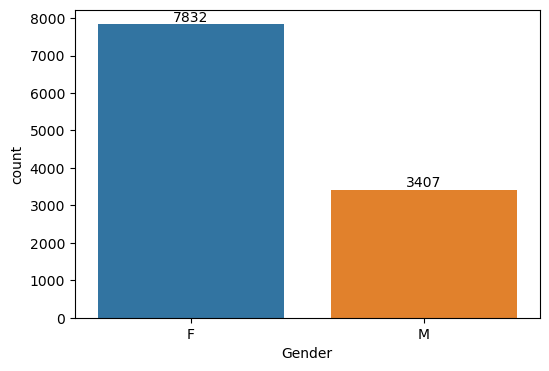

In [57]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Gender',data=dataset)
for bars in ax.containers:
    ax.bar_label(bars)

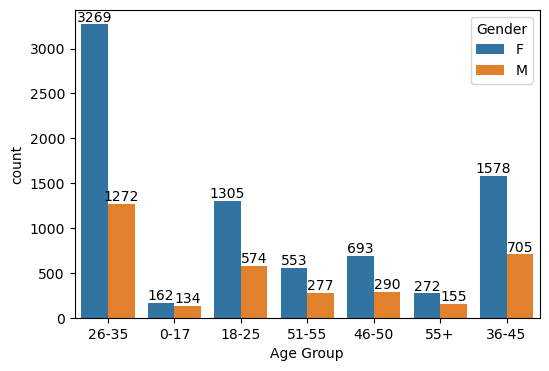

In [68]:
plt.figure(figsize=(6,4))
AG=sns.countplot(x="Age Group", data=dataset, hue= 'Gender')

for bars in AG.containers:
    AG.bar_label(bars)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

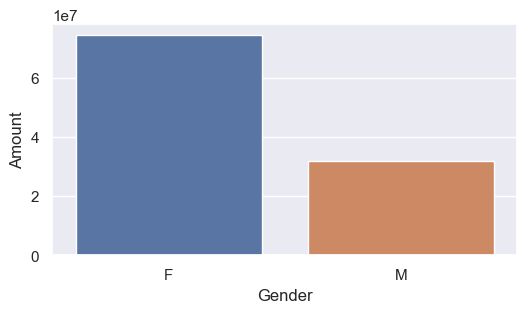

In [140]:
# plotting a bar chart for gender vs total amount
sales_gen = dataset.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,3)})
sns.barplot(x='Gender',y='Amount', data=sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

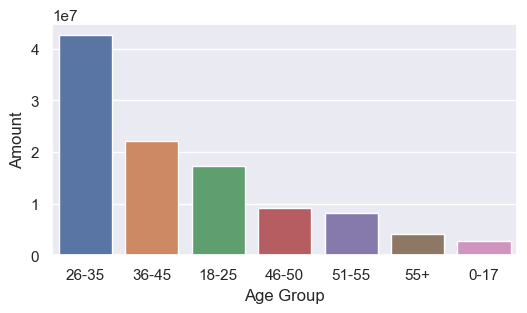

In [139]:
# Total Amount vs Age Group
sales_age = dataset.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,3)})
sns.barplot(x='Age Group',y='Amount', data=sales_age)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

<AxesSubplot:xlabel='State', ylabel='Amount'>

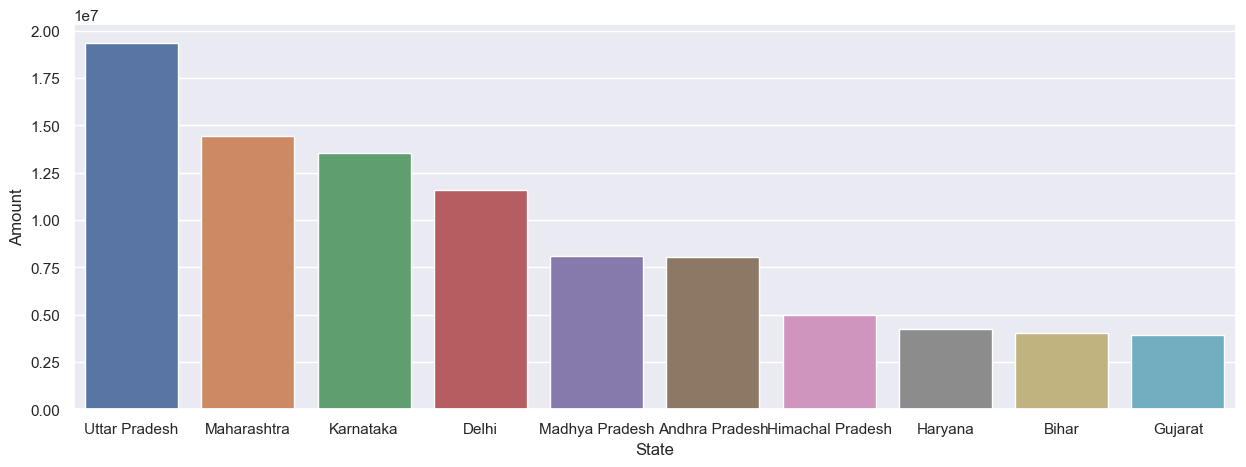

In [79]:
# total number of number from top 10 states
sales_state = dataset.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Amount', data=sales_state)

<AxesSubplot:xlabel='State', ylabel='Orders'>

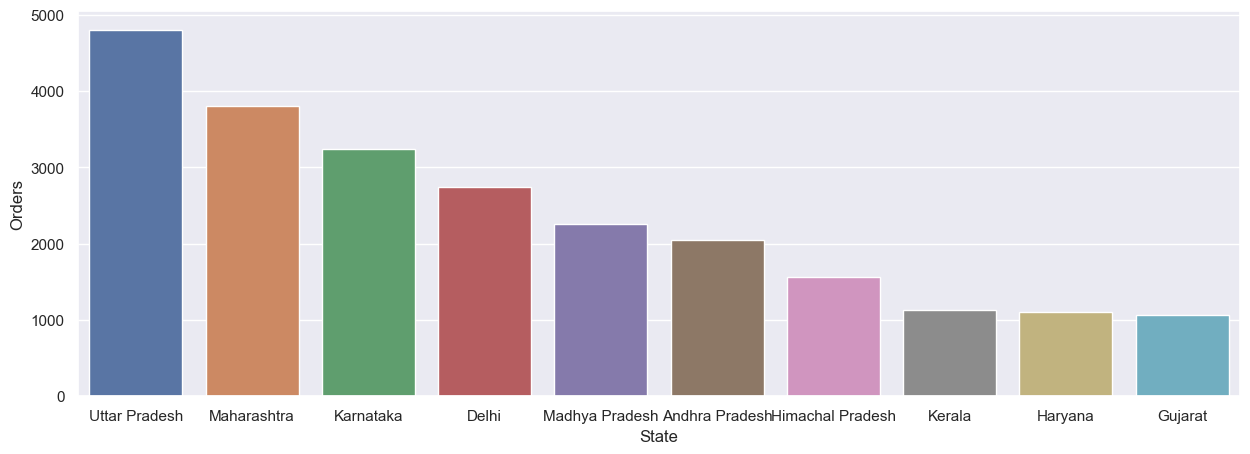

In [78]:
# total number of orders from top 10 states
order_state = dataset.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Orders', data=order_state)

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

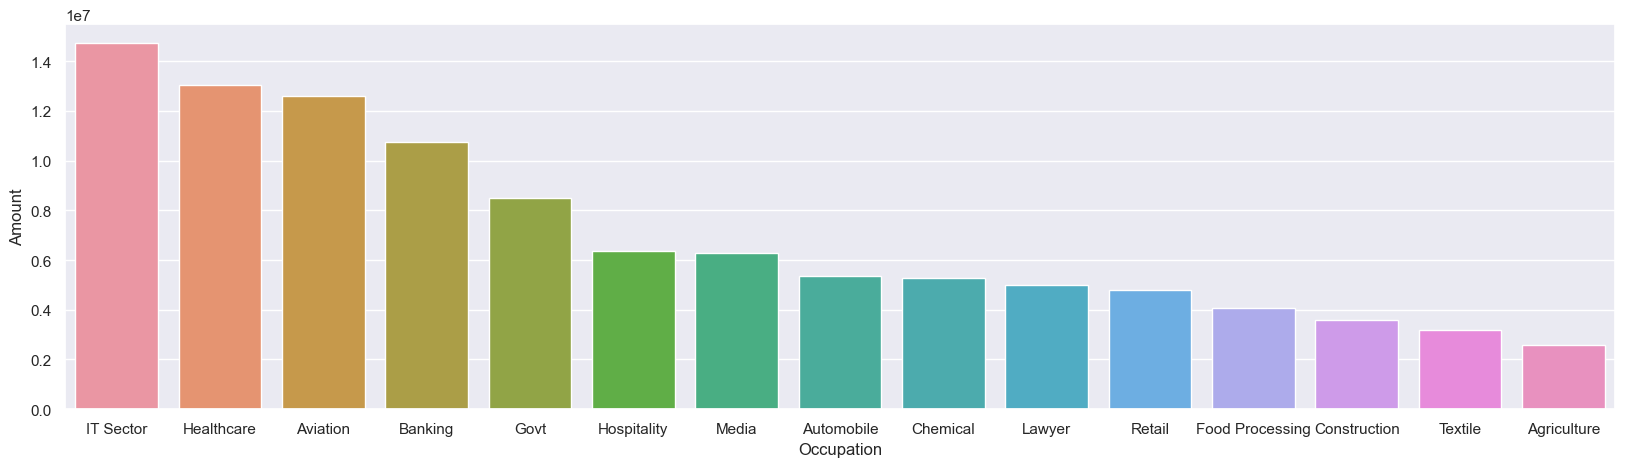

In [136]:
sales_Occ = dataset.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation',y='Amount', data=sales_Occ)

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

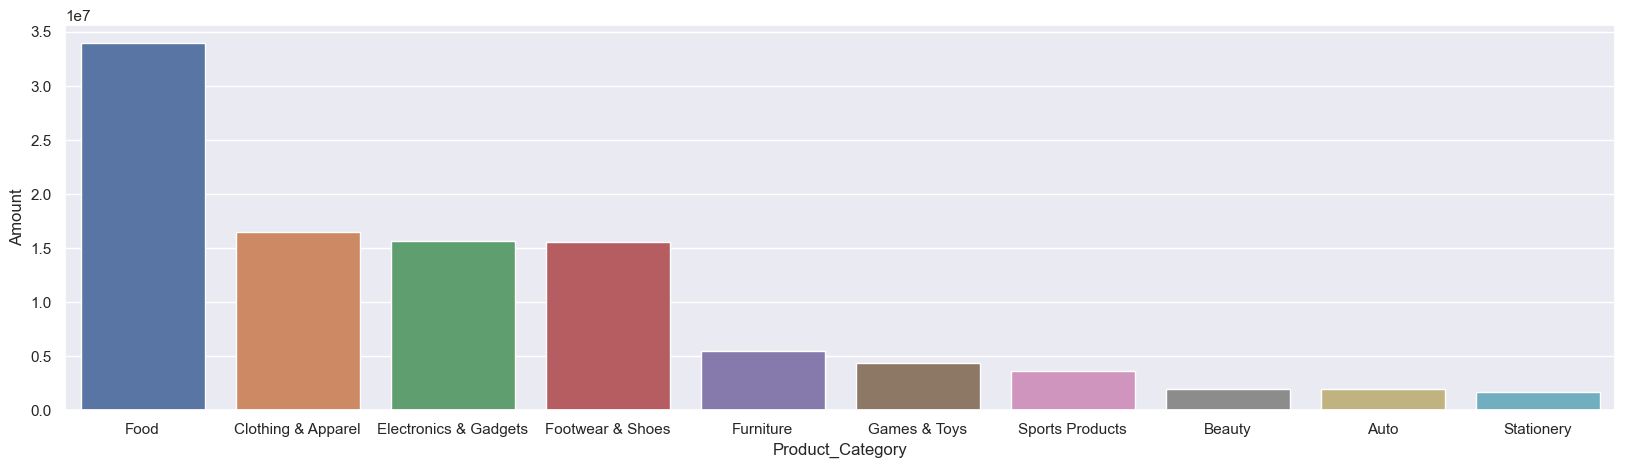

In [85]:
PC_sales = dataset.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category',y='Amount', data=PC_sales)

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

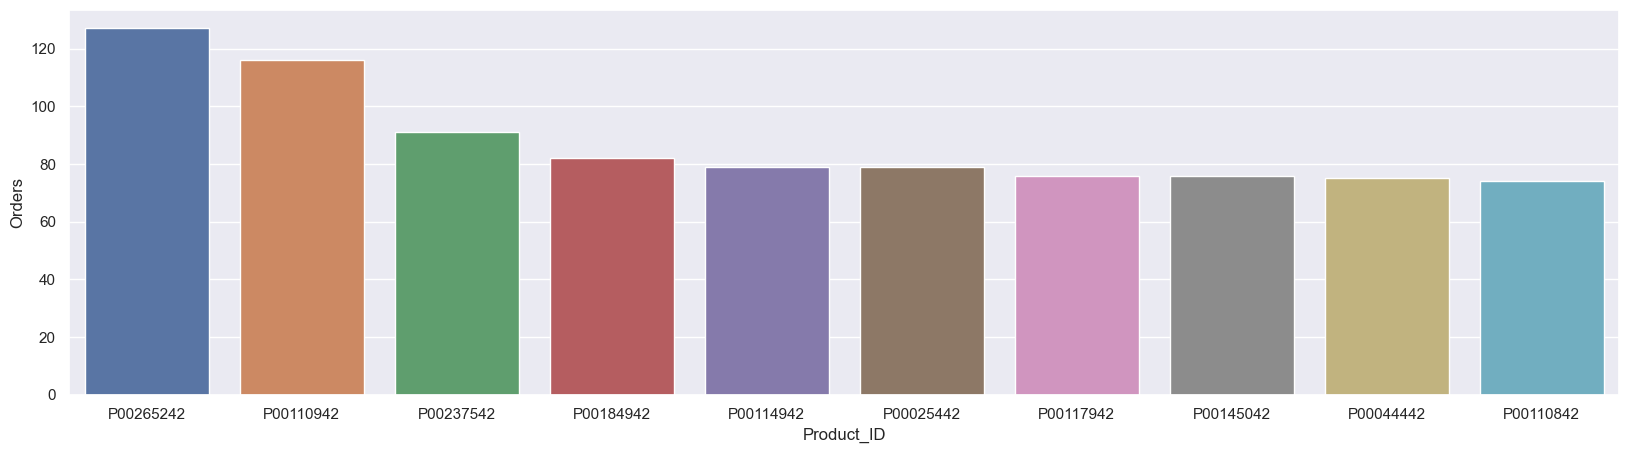

In [123]:
PI_sales = dataset.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_ID',y='Orders', data=PI_sales)

From above graphs we can see that most of the orders are from P00265242, P00110942 and P00237542 product Id

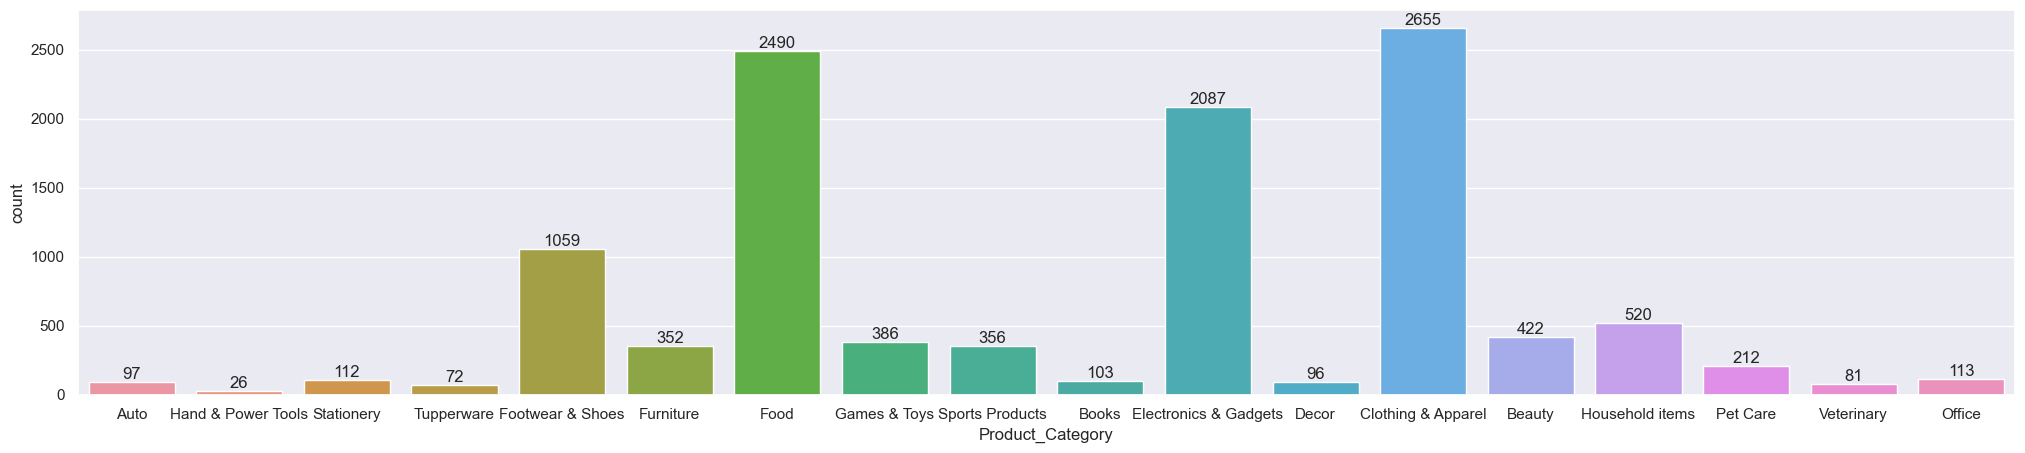

In [88]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(data = dataset, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

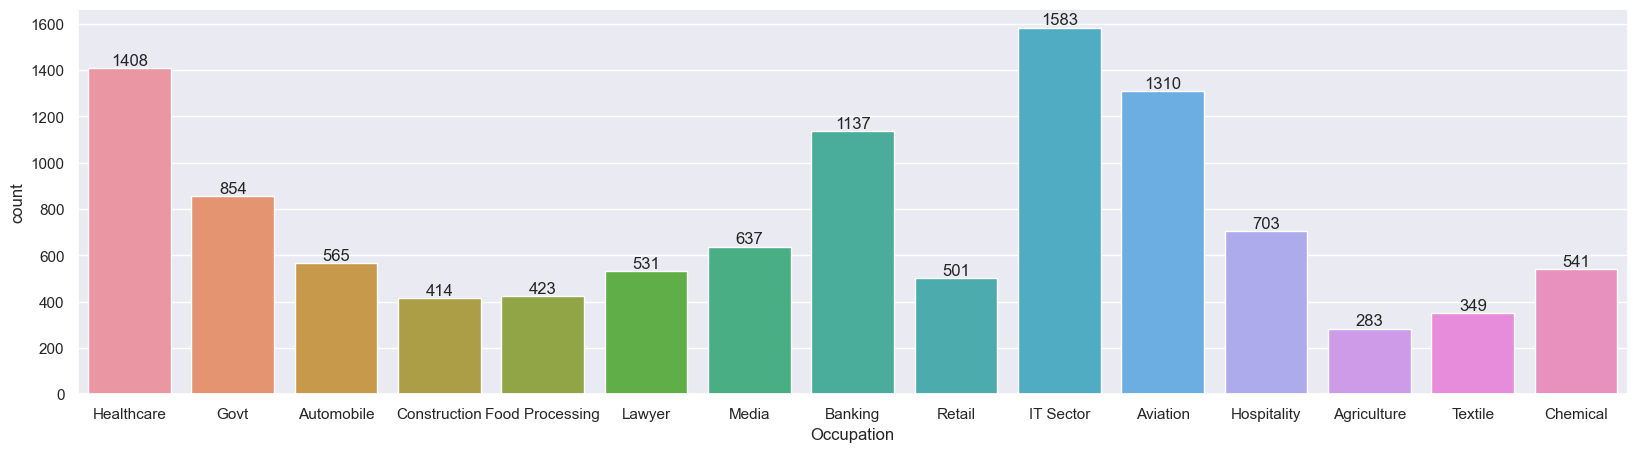

In [90]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = dataset, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

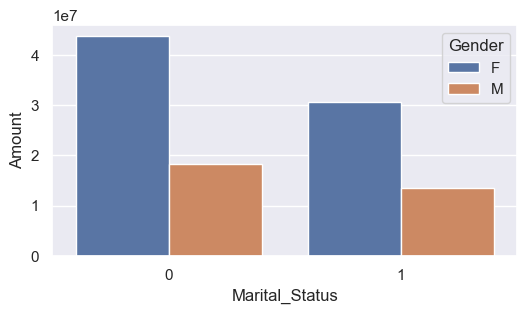

In [137]:
sales_state = dataset.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,3)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

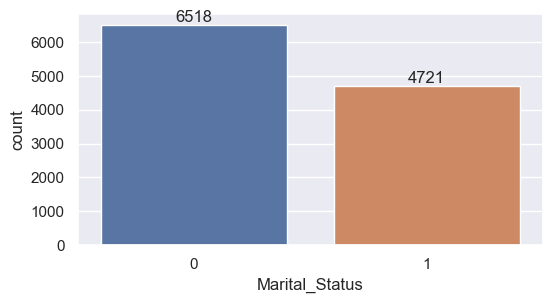

In [138]:
ax = sns.countplot(data = dataset, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,3)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_ID'>

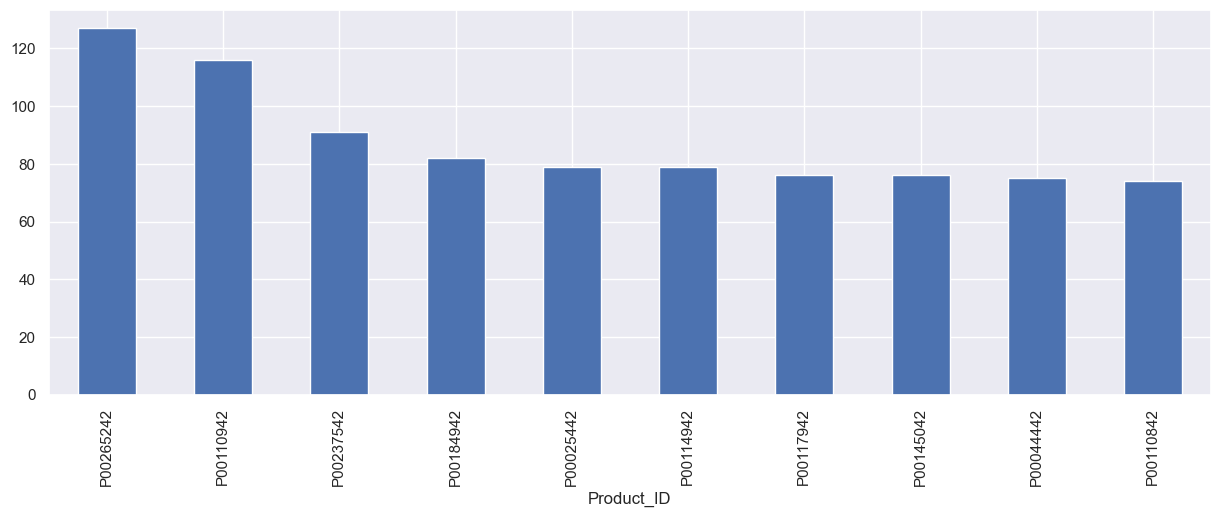

In [122]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(15,5))
dataset.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Conclusion:

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category

From above graph we can see that most of sales are come from IT sector, healthcare and Aviation Occupation 